# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports

# Sentiment Analysis
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Natural Language Processing
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

# NGrams and Frequency Analysis
from collections import Counter
from nltk import ngrams

# Word Clouds
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl

# Named Entity Recognition
import spacy
from spacy import displacy

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/christianseeley/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)
# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 8362


{'source': {'id': None, 'name': 'Lifehacker.com'},
 'author': 'Jeff Somers',
 'title': 'Is the Crypto Bubble Going to Burst?',
 'description': 'Even if you aren’t paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 trillion last year to about $1.5 trillion in a matter of days…',
 'url': 'https://lifehacker.com/is-the-crypto-bubble-going-to-burst-1848475768',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/976a59b09e0e681e692bd7517498e3f2.jpg',
 'publishedAt': '2022-02-09T16:00:00Z',
 'content': 'Even if you arent paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 tr… [+4782 chars]'}

In [5]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)
# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]

Total articles about Ethereum: 3907


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Corin Faife',
 'title': 'Crypto.com admits over $30 million stolen by hackers',
 'description': 'Cryptocurrency exchange Crypto.com has said that $15 million in ethereum and $18 million in bitcoin were stolen by hackers in a security breach',
 'url': 'https://www.theverge.com/2022/1/20/22892958/crypto-com-exchange-hack-bitcoin-ethereum-security',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/mde_l3lUC4muDPEFG7LYrUz0O3g=/0x146:2040x1214/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/8921023/acastro_bitcoin_2.jpg',
 'publishedAt': '2022-01-20T13:23:31Z',
 'content': 'In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn a blog post published in the early hours of Thursday morning, cryptocurrency… [+2004 chars]'}

In [6]:
bitcoin_headlines = newsapi.get_everything(q="bitcoin", language="en")

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    
# Creating the DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral","Text"]
bitcoin_df = bitcoin_df[cols]
bitcoin_df.head()

,Compound,Positive,Negative,Neutral,Text
0,0.5859,0.124,0.000,0.876,Even if you arent paying attention to Bitcoin ...
1,0.0000,0.000,0.000,1.000,When Denis Rusinovich set up cryptocurrency mi...
2,0.3182,0.105,0.000,0.895,El Salvador introduced Bitcoin as a legal tend...
3,-0.4404,0.000,0.083,0.917,Were officially building an open Bitcoin minin...
4,-0.3182,0.045,0.084,0.871,Israeli national Tal Prihar pled guilty to rou...


In [8]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    
# Creating the DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral","Text"]
ethereum_df = ethereum_df[cols]
ethereum_df.head()



,Compound,Positive,Negative,Neutral,Text
0,0.0000,0.000,0.0,1.000,"In a new blog post the company said that 4,836..."
1,0.0000,0.000,0.0,1.000,Hackers who made off with roughly $15 million ...
2,0.1779,0.052,0.0,0.948,"On some level, the new mayor is simply employi..."
3,0.0772,0.038,0.0,0.962,"Back in September\r\n, Robinhood announced pla..."
4,0.0000,0.000,0.0,1.000,This enables an L1 platform to bootstrap its n...


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.039480,0.060950,0.041250,0.897800
std,0.393121,0.059169,0.049184,0.068563
min,-0.493900,0.000000,0.000000,0.729000
25%,-0.344025,0.000000,0.000000,0.874750
50%,0.038600,0.054000,0.000000,0.912000
75%,0.328950,0.108750,0.085000,0.934000
max,0.680800,0.185000,0.151000,1.000000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Positive,Negative,Neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.232735,0.079750,0.022630,0.897630
std,0.372008,0.074598,0.041154,0.081844
min,-0.709600,0.000000,0.000000,0.716000
25%,0.000000,0.000000,0.000000,0.841250
50%,0.190100,0.070000,0.000000,0.904500
75%,0.536525,0.130250,0.046000,0.974500
max,0.880700,0.265000,0.174000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
# Instantiating the lemmatizer
lemmatizer = WordNetLemmatizer()

# Creating a list of stopwords
sw = stopwords.words('english')

# Expanding the default stopwords list if necessary

other_sw = ['char', 'ha', 'wa']
sw.extend(other_sw)

In [12]:
# Completing the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Removing the punctuation from text
    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)
   
    # Creating a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatizing words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Converting the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    # Removing the stop words
    remove_sw = set(stopwords.words('english'))    
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin

bitcoin_df["tokens"] = bitcoin_df.Text.apply(tokenizer)
bitcoin_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.5859,0.124,0.000,0.876,Even if you arent paying attention to Bitcoin ...,"[even, arent, paying, attention, bitcoin, cryp..."
1,0.0000,0.000,0.000,1.000,When Denis Rusinovich set up cryptocurrency mi...,"[denis, rusinovich, set, cryptocurrency, minin..."
2,0.3182,0.105,0.000,0.895,El Salvador introduced Bitcoin as a legal tend...,"[el, salvador, introduced, bitcoin, legal, ten..."
3,-0.4404,0.000,0.083,0.917,Were officially building an open Bitcoin minin...,"[officially, building, open, bitcoin, mining, ..."
4,-0.3182,0.045,0.084,0.871,Israeli national Tal Prihar pled guilty to rou...,"[israeli, national, tal, prihar, pled, guilty,..."


In [14]:
# Create a new tokens column for Ethereum

ethereum_df["tokens"] = ethereum_df.Text.apply(tokenizer)
ethereum_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.0000,0.000,0.0,1.000,"In a new blog post the company said that 4,836...","[new, blog, post, company, said, 4836, eth, 44..."
1,0.0000,0.000,0.0,1.000,Hackers who made off with roughly $15 million ...,"[hackers, made, roughly, 15, million, ethereum..."
2,0.1779,0.052,0.0,0.948,"On some level, the new mayor is simply employi...","[level, new, mayor, simply, employing, ageold,..."
3,0.0772,0.038,0.0,0.962,"Back in September\r\n, Robinhood announced pla...","[back, september, robinhood, announced, plan, ..."
4,0.0000,0.000,0.0,1.000,This enables an L1 platform to bootstrap its n...,"[enables, l1, platform, bootstrap, national, e..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
# Generate the Bitcoin N-grams where N=2
btc_tokens = [btc for bits in bitcoin_df['tokens'] for btc in bits]
bigram_counts = Counter(ngrams(btc_tokens, n=2))
bigram_counts.most_common(20)

[(('bitcoin', 'mining'), 4),
 (('el', 'salvador'), 3),
 (('alex', 'castro'), 3),
 (('building', 'open'), 3),
 (('open', 'bitcoin'), 3),
 (('mining', 'system'), 3),
 (('blog', 'post'), 3),
 (('alongside', 'us'), 2),
 (('illustration', 'alex'), 2),
 (('international', 'monetary'), 2),
 (('officially', 'building'), 2),
 (('raedlegetty', 'imagesblock'), 2),
 (('castro', 'vergein'), 2),
 (('new', 'blog'), 2),
 (('post', 'company'), 2),
 (('company', 'said'), 2),
 (('jack', 'dorsey'), 2),
 (('even', 'arent'), 1),
 (('arent', 'paying'), 1),
 (('paying', 'attention'), 1)]

In [16]:
# Generate the Ethereum N-grams where N=2
eth_tokens = [eth for bits in ethereum_df['tokens'] for eth in bits]
bigram_counts = Counter(ngrams(eth_tokens, n=2))
bigram_counts.most_common(20)

[(('new', 'york'), 9),
 (('nonfungible', 'token'), 5),
 (('digital', 'asset'), 5),
 (('company', 'said'), 4),
 (('york', 'city'), 4),
 (('reuters', 'bitcoin'), 4),
 (('blog', 'post'), 3),
 (('cryptocurrency', 'exchange'), 3),
 (('token', 'nft'), 3),
 (('nft', 'marketplace'), 3),
 (('bitcoin', 'ethereum'), 3),
 (('buy', 'sell'), 3),
 (('new', 'blog'), 2),
 (('post', 'company'), 2),
 (('million', 'ethereum'), 2),
 (('according', 'new'), 2),
 (('new', 'report'), 2),
 (('ethereum', 'digital'), 2),
 (('known', 'smart'), 2),
 (('smart', 'contract'), 2)]

In [17]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [18]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_tokens, N=10)

[('bitcoin', 16),
 ('company', 9),
 ('cryptocurrency', 7),
 ('mining', 6),
 ('open', 5),
 ('new', 5),
 ('el', 4),
 ('building', 4),
 ('last', 3),
 ('salvador', 3)]

In [19]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_tokens, N=10)

[('cryptocurrency', 30),
 ('ethereum', 24),
 ('bitcoin', 22),
 ('new', 21),
 ('digital', 15),
 ('reuters', 13),
 ('blockchain', 12),
 ('million', 11),
 ('crypto', 11),
 ('token', 10)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [20]:
# style adjustment variables
plt.style.use('seaborn-whitegrid')
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

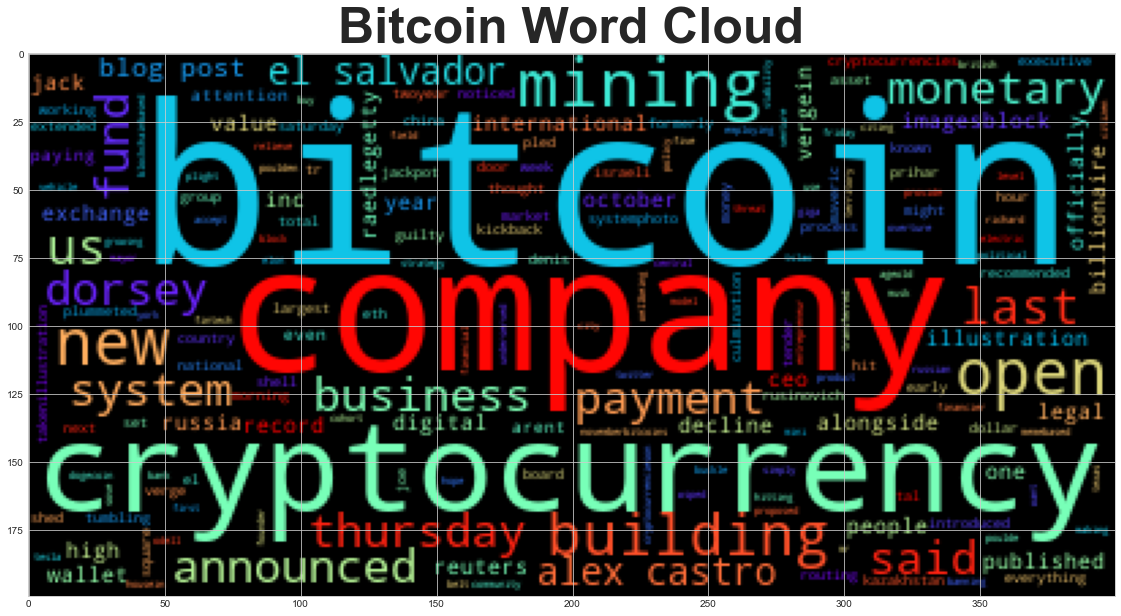

In [21]:
# Generate the Bitcoin word cloud
big_string = ' '.join(btc_tokens)
wc = WordCloud(colormap="rainbow").generate(big_string)
plt.title("Bitcoin Word Cloud", {"fontsize":50, "fontweight": "bold"})
plt.imshow(wc);

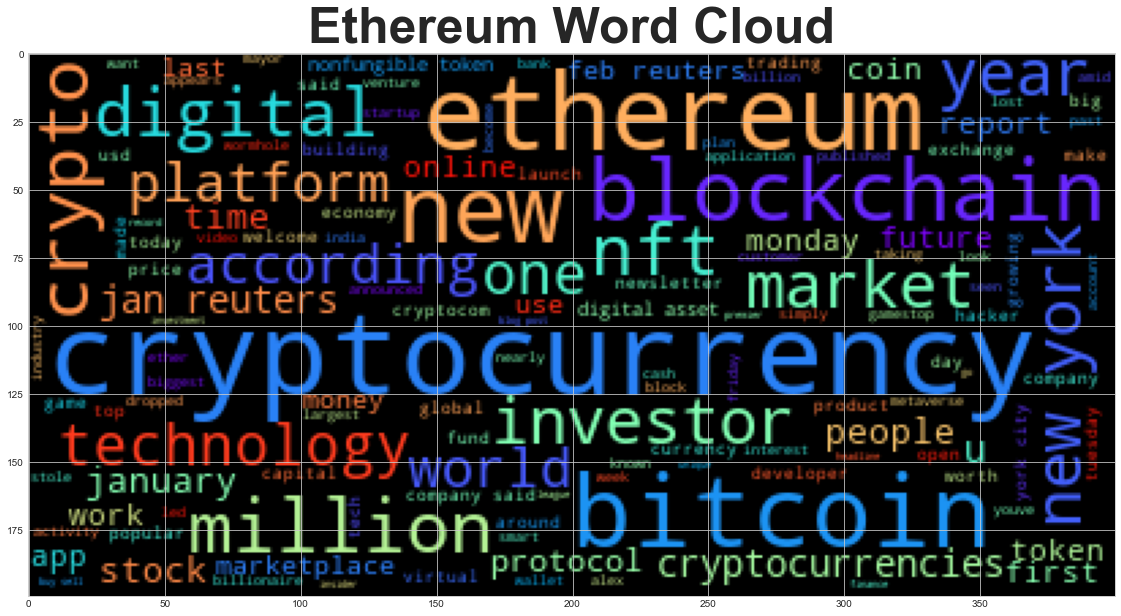

In [22]:
# Generate the Ethereum word cloud
big_string = ' '.join(eth_tokens)
wc = WordCloud(colormap="rainbow").generate(big_string)
plt.title("Ethereum Word Cloud", {"fontsize":50, "fontweight": "bold"})
plt.imshow(wc);

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [23]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [24]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [25]:
# Concatenate all of the Bitcoin text together
btc_all_text = bitcoin_df.Text.sum()
btc_all_text

'Even if you arent paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 tr… [+4782 chars]When Denis Rusinovich set up cryptocurrency mining company Maveric Group in Kazakhstan in 2017, he thought he had hit the jackpot. Next door to China and Russia, the country had everything a Bitcoin … [+4140 chars]El Salvador introduced Bitcoin as a legal tender alongside the US dollar in 2021. | Illustration by Alex Castro / The Verge\r\n\n \n\n The International Monetary Fund’s executive board has recommended El … [+2691 chars]Were officially building an open Bitcoin mining system\r\nPhoto by Joe Raedle/Getty Images\r\nBlock, the payment company formerly known as Square, is working on building an open Bitcoin mining system, it… [+2078 chars]Israeli national Tal Prihar pled guilty to routing money from kickbacks through Bitcoin and shell companies \r\nIllustration by Alex C

In [26]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_all_text)

# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin NER"

In [27]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [28]:
# List all Entities
for ent in btc_doc.ents:
    print(ent.text, ent.label_)

last week DATE
3 MONEY
Denis Rusinovich PERSON
Maveric Group ORG
Kazakhstan GPE
2017 DATE
China GPE
Russia GPE
chars]El Salvador GPE
US GPE
2021 DATE
Alex Castro PERSON
Verge ORG
The International Monetary Fund’s ORG
El ORG
Bitcoin PERSON
Joe Raedle/Getty Images PERSON
Square FAC
Bitcoin PERSON
Tal Prihar PERSON
Illustration ORG
Alex Castro PERSON
Verge ORG
two-year DATE
4,836 CARDINAL
ETH ORG
443 CARDINAL
Alex Castro PERSON
Verge ORG
the early hours TIME
Thursday DATE
morning TIME
Saturday DATE
more than 50% PERCENT
November DATE
more than $ MONEY
Jack Dorsey PERSON
Twitter PRODUCT
first ORDINAL
October last year DATE
the "Giga Texas ORG
Elon Musk PERSON
Friday DATE
Fintech ORG
New York City GPE
Richard ODell PERSON
house ORG
October DATE
Poulde GPE
chars]Russia GPE
Thursday DATE
Russian NORP
the last five years DATE
about 25,000 CARDINAL
Lichtensteins PERSON
Bitcoin PERSON
El Salvador GPE
US GPE
The International Monetary Fund ORG
El Salvador GPE
Changpeng PERSON
Binance PERSON
Reute

---

### Ethereum NER

In [29]:
# Concatenate all of the Ethereum text together
eth_all_text = ethereum_df.Text.sum()
eth_all_text

'In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn a blog post published in the early hours of Thursday morning, cryptocurrency… [+2004 chars]Hackers who made off with roughly $15 million in ethereum from Crypto.com are attempting to launder the funds through a so-called ethereum mixer, known as Tornado Cash, according to a new report from… [+3891 chars]On some level, the new mayor is simply employing an age-old political strategy: making overtures to the business community. Fintech is a growing field in New York City, and blockchain-based companies… [+1562 chars]Back in September\r\n, Robinhood announced plans to test a cryptocurrency wallet within its app. At the time, the company said it would open the beta to a small number of people before expanding availa… [+1069 chars]This enables an L1 platform to bootstrap its national economy over time through a flywheel between financial speculation around its nativ

In [30]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_all_text)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [31]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [32]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

4,836 CARDINAL
ETH ORG
443 CARDINAL
Alex Castro PERSON
Verge ORG
the early hours TIME
Thursday DATE
morning TIME
roughly $15 million MONEY
Crypto.com ORG
Tornado Cash PERSON
Fintech ORG
New York City GPE
September DATE
Robinhood ORG
Crypto.com ORG
about $34 million MONEY
Monday DATE
Ethereum ORG
Ethereum GPE
418% PERCENT
2021 DATE
AMC Entertainment ORG
AMC ORG
GME ORG
Ethereums ORG
more than 650% PERCENT
Vitalik Buterin PERSON
Ethereum ORG
7 CARDINAL
Reuters ORG
Monday DATE
$450 million MONEY
Sequoia Capital India ORG
OPEN ORG
second ORDINAL
OPEN ORG
second ORDINAL
nearly $324 million MONEY
Getty Images PERSON
more than $324 million MONEY
Wormhole PERSON
120,000 CARDINAL
wEth ORG
Ethereum ORG
nearly $324 million MONEY
Getty Images PERSON
more than $324 million MONEY
Wormhole PERSON
chars]In PERSON
Bloomberg TV ORG
Crypto.com ORG
Kris Marszalek PERSON
400 CARDINAL
Richard ODell PERSON
house ORG
October DATE
Poulde GPE
4 CARDINAL
Reuters ORG
8.82% PERCENT
40,611.4 MONEY
2202 DATE
Friday 

---